In [1]:
import numpy as np
from numba import njit


def numpy_ref(N, x, y):
    """ Numpy reference for initializing and summing over all elements. """
    a = np.outer(x, y)
    return a.sum()

@njit
def fun(i,j, x, y):
    return x[i]*y[j]

@njit
def funct_eval(N, fun, x, y):
    res = 0
    for i in range(N):
        for j in range(N):
            res += fun(i, j, x, y)
    return res

@njit
def loop_eval(N, x, y):
    res = 0
    for i in range(N):
        for j in range(N):
            res += x[i]*y[j]
    return res


In [2]:
from timeit import repeat
from numpy.random import default_rng

N = [10, 100, 1000, 10000, 20000]
p = 0.5
rnd = default_rng()
x = rnd.random(N[-1])
y = rnd.random(N[-1])

In [3]:
# Numpy reference 
np_ref = [None]*len(N)
for i, n in enumerate(N):
    np_ref[i] = np.array(repeat("numpy_ref({}, x, y)".format(n), 
                                setup="from __main__ import numpy_ref, x, y",
                                number=5, repeat=5)) / 5

In [4]:
# No function call
loop = [None]*len(N)
for i, n in enumerate(N):
    loop[i] = np.array(repeat("loop_eval({}, x, y)".format(n), 
                              setup="from __main__ import loop_eval, x, y",
                              number=7, repeat=5)) / 7

In [5]:
# With function call
func = [None]*len(N)
for i, n in enumerate(N):
    func[i] = np.array(repeat("funct_eval({}, fun, x, y)".format(n), 
                              setup="from __main__ import funct_eval, fun, x, y",
                              number=7, repeat=5)) / 7

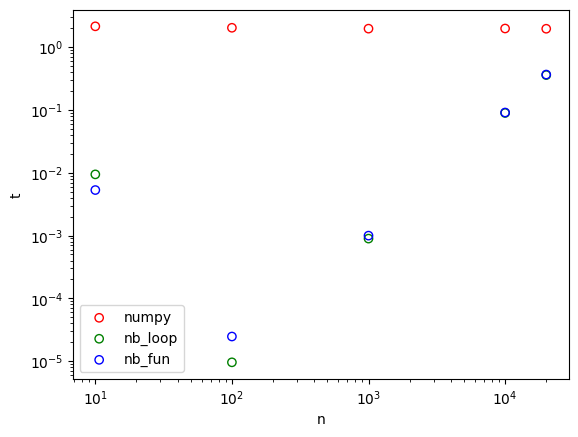

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(N, np.mean(np_ref, axis=1), marker='o', facecolor='None', edgecolor='r', label='numpy')
ax.scatter(N, np.mean(loop, axis=1), marker='o', facecolor='None', edgecolor='g', label='nb_loop')
ax.scatter(N, np.mean(func, axis=1), marker='o', facecolor='None', edgecolor='b', label='nb_fun')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('n')
ax.set_ylabel('t')
plt.legend()

plt.show()